# selenium 활용하여 크롤링해보기

* selenium: 동적으로 화면을 업데이트
* 크롬창을 직접 오픈해서 html 페이지를 받아옴

## 사전 준비

### 패키지 다운로드

In [1]:
!pip install selenium

     |████████████████████████████████| 911kB 6.5MB/s 


### Google Colab으로 하는 경우
아래 명령으로 크롬 드라이버 설치

In [2]:
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [60.9 kB]
Hit:12 http://ppa.launchpad.net/cran/

## 이미지 긁어오기

### 크롤링 준비

In [3]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time
import os

In [4]:
# 크롤링할 웹 사이트 정보
base_url = 'https://www.tripadvisor.co.kr'
seoul_url = '/Restaurants-g294197-Seoul.html'

### 크롬창을 오픈하여 html 받아오기

#### 로컬에서 실행하는 경우

In [ ]:
options = Options()
# options.headless = True  # Chrome이 직접적으로 열리지 않고 백그라운드에서 실행되도록 하는 옵션

browser = webdriver.Chrome(options=options)
browser.implicitly_wait(3)
browser.get(base_url+seoul_url)
time.sleep(5)

WebDriverException: ignored

**[참고]**  

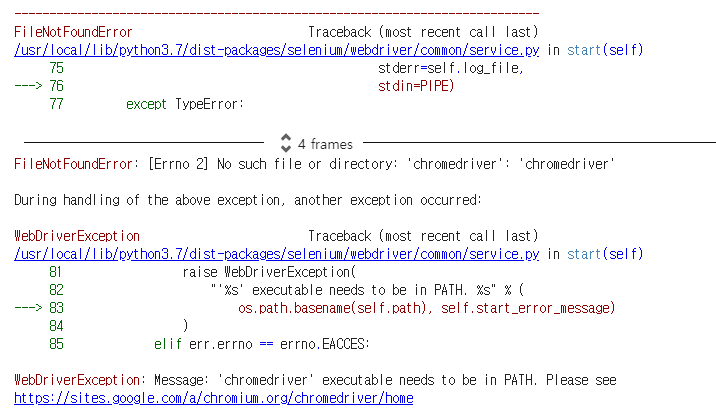  
드라이버 없다는 에러 뜰 경우, 링크 타고 들어가서 드라이버 다운받고  
현재 스크립트와 같은 경로에 드라이버 넣기 (chromedriver.exe)  

#### Google Colab으로 하는경우

In [5]:
options = Options()
options.add_argument('--headless')  # 크롬 창이 직접 열리지 않고 백그라운드에서 실행되게 하는 옵션
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

browser = webdriver.Chrome('chromedriver', options=options)
browser.get(base_url+seoul_url)

### 데이터 가공

In [6]:
# BeautifulSoup을 활용하여 데이터 파싱
html = browser.page_source
soup = BeautifulSoup(html, 'html.parser')

In [7]:
# 이미지 골라서 저장
photos = soup.findAll('div', {'class' : '_2Hb-Mt7l'})

In [8]:
for photo in photos[:10]:
    print(photo)

<div class="_2Hb-Mt7l" style='background-image: url("https://media-cdn.tripadvisor.com/media/photo-s/15/0f/ad/6b/caption.jpg");'></div>
<div class="_2Hb-Mt7l" style='background-image: url("https://media-cdn.tripadvisor.com/media/photo-s/19/f6/82/eb/patisserie-by-the-entrance.jpg");'></div>
<div class="_2Hb-Mt7l" style='background-image: url("https://media-cdn.tripadvisor.com/media/photo-s/1c/2c/72/c8/privilege-bar.jpg");'></div>
<div class="_2Hb-Mt7l" style='background-image: url("https://media-cdn.tripadvisor.com/media/photo-s/1c/34/1d/df/privilege-bar.jpg");'></div>
<div class="_2Hb-Mt7l" style='background-image: url("https://media-cdn.tripadvisor.com/media/photo-s/1c/2c/6f/23/cleo-restaurant.jpg");'></div>
<div class="_2Hb-Mt7l" style='background-image: url("https://media-cdn.tripadvisor.com/media/photo-s/1c/34/1d/aa/cleo-restaurant.jpg");'></div>
<div class="_2Hb-Mt7l" style='background-image: url("https://media-cdn.tripadvisor.com/media/photo-s/0d/54/46/d9/interior.jpg");'></div>


In [9]:
# 폴더 경로 지정 (없으면 생성)
img_dir = f"{os.getcwd()}/img"

if not os.path.isdir(img_dir):
   os.mkdir(img_dir)

In [10]:
# 파일 형태로 저장
for photo in photos :
    url = photo.get('style').split('"')[1]
    img_file_name = url.split('/')[-1]
    img_data = requests.get(url).content
    
    # byte array로 온 img_data를 파일로 쓰는 부분
    with open(f'img/i{img_file_name}', 'wb') as handler:
        handler.write(img_data)

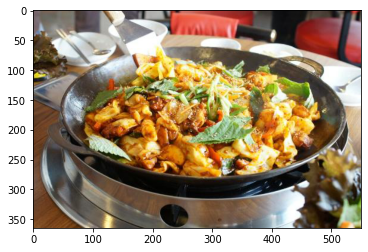

In [17]:
# 이미지 중 한장 확인해보기
import matplotlib.pyplot as plt

img_file_name = photos[0].get('style').split('"')[1].split('/')[-1]
img = plt.imread(f'img/i{img_file_name}')
plt.imshow(img)

# [실습]
부산 이미지 다운받기

## 크롤링

In [19]:
#1. url 설정
busan_url = '/Restaurants-g297884-Busan.html'

### 로컬에서 실행하는 경우

In [ ]:
options = Options()
options.headless = True  # Chrome이 직접적으로 열리지 않고 백그라운드에서 실행되도록 하는 옵션
browser = webdriver.Chrome(options=options)
browser.implicitly_wait(3)
browser.get(base_url+seoul_url)
time.sleep(5)

# BeautifulSoup을 활용하여 데이터 파싱
html = browser.page_source
soup = BeautifulSoup(html, 'html.parser')

### Google Colab으로 하는 경우

In [20]:
options = Options()
options.add_argument('--headless')  # 크롬 창이 직접 열리지 않고 백그라운드에서 실행되게 하는 옵션
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

browser = webdriver.Chrome('chromedriver', options=options)
browser.get(base_url+busan_url)

html = browser.page_source
soup = BeautifulSoup(html, 'html.parser')

## 데이터 가공

In [21]:
#2. 이미지 저장 경로 바꾸기 : busan_img/
img_dir = f"{os.getcwd()}/busan_img"
if not os.path.isdir(img_dir):
   os.mkdir(img_dir)

#3. 이미지 파일명 바꾸기 
#       : photo_1.jpg, photo_2.jpg ... 이런 형태
photos = soup.findAll('div', {'class' : '_2Hb-Mt7l'})
i = 1

for photo in photos :
    url = photo.get('style').split('"')[1]
    img_file_name = 'photo_%d.jpg' % i
    i += 1
    img_data = requests.get(url).content
    
    # byte array로 온 img_data를 파일로 쓰는 부분
    with open(f'busan_img/i{img_file_name}', 'wb') as handler:
        handler.write(img_data)

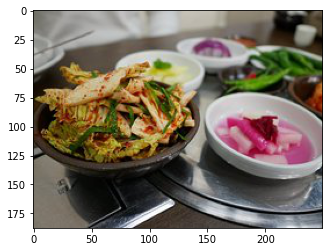

In [23]:
# 이미지 중 한장 확인해보기
import matplotlib.pyplot as plt

img_file_name = 'photo_1.jpg'
img = plt.imread(f'busan_img/i{img_file_name}')
plt.imshow(img)